# Model and Model performance

We are now ready to start looking at other models!

We will try to model the data with 4 models: Ordinary least square, Ridge regression, LASSO regression and random forest.

For evaluation metric, we will use R square, Root Mean Square Error (RMSE) and mean absolute error (MAE)

In [24]:
from sklearn.linear_model import LinearRegression,RidgeCV ,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from collections import defaultdict

def RMSE (act,pred):
    return np.sqrt(np.mean((act-pred)**2))

seed = 111

In [ ]:
# need to decide whether to use RidgeVC/LassoCV or gridserach.. heheh maybe the respective CV is better

#1 fit linear model
#2 process using standard scalar
#3 fit ridge & tune parameters
#4 fit lasso & tune parameters
#5 fit random forest & tune parameters
#6 cv to see which model performs best
#7 conclusion which model to use

#8 prepare preso > idea: plot a graph of diff model performance regarding these 3 metrics
# prepare interpretation of model
# translate to human language

In [2]:
data_test = pd.read_pickle('data_test.pkl')
data_train = pd.read_pickle('data_train.pkl')

In [3]:
def get_metrics (act,pred):
    return r2_score(act,pred),RMSE(act,pred),mean_absolute_error(act,pred)

## Linear Regression using OLS

First we would like to fit a model with out transforming target variable

In [71]:
def treat_features (df):
    columns_to_keep = ['town','storey','flat_type','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = df['resale_price']
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','school_rank_nearby','flat_model','flat_type']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = False)
    return X,y

In [37]:
X,y = treat_features(data_train)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)

In [38]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_val)

lr_r2,lr_RMSE,lr_MAE = get_metrics(y_val,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(lr_r2,lr_RMSE,lr_MAE))

The R2 score is 0.870 ,RMSE is 56346.807, MAE is 42984.239


In [39]:
err_dict = defaultdict()
err_dict['All_flat_type'] = [lr_r2,lr_RMSE,lr_MAE]

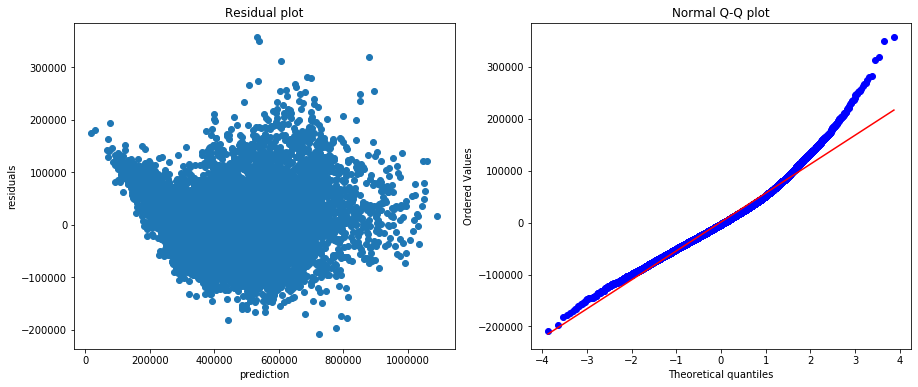

In [40]:
def diagnostic_plot(y_true,y_pred):
    plt.figure(figsize=(15,6))
    
    plt.subplot(1, 2, 1)
    res = y_true - y_pred
    plt.scatter(y_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
diagnostic_plot(y_val,y_pred)

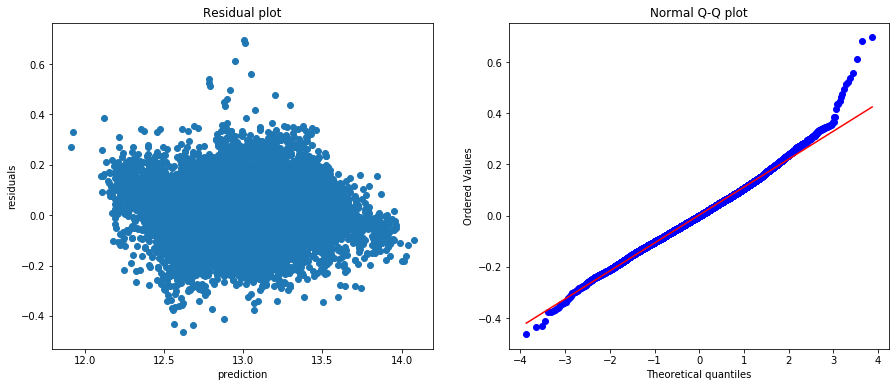

In [135]:
diagnostic_plot(y_val,y_pred)



However, the current model still show a violation of the residual assumption, we try to segment the data so that we can remove some outliners hence making the model suitable for linear regression

After some reading, we want to try if segmenting the data by flat type could help improving the fit
below is an example for 4 room flat

In [42]:
def treat_features_filter (df,fil):
    df = pd.DataFrame(df[df['flat_type'] == fil])
    columns_to_keep = ['town','storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = df['resale_price']
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','school_rank_nearby','flat_model']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = False)
    return X,y

In [43]:
X,y = treat_features_filter(data_train,"4 ROOM")
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Zhiqing\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Zhiqing\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Zhiqing\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Zhiqing\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2164.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:22:33   Log-Likelihood:            -1.9095e+05
No. Observations:               15687   AIC:                         3.820e+05
Df Residuals:                   15646   BIC:                         3.823e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -4.003e+04   9102.279     -4.397      0.000   -5.79e+04   -2.22e+04
storey                                 4048.7072     71.505     56.621      0.000    3908.549    4188.865
floor_area_sqm                         2237.4381     90.846     24.629      0.000    2059.370    2415.506
Remaining_lease_years                  3759.9428     72.532     51.838      0.000    3617.772    3902.114
num_schools                            3100.5888    198.286     15.637      0.000    2711.925    3489.252
town_ANG MO KIO                        2.836e+04   2423.792     11.699      0.000    2.36e+04    3.31e+04
town_BEDOK                             7156.6903   1982.515      3.610      0.000    3270.732     1.1e+04
town_BISHAN                            8.923e+04   2660.778     33.536      0.000     8.4e+04    9.44e+04
town_BUKIT BATOK                      -7.516e+04   2138.172    -35.151      0.000   -7.94e+04    -7.1e+04
town_BUKIT MERAH                       1.505e+05   2061.866     72.970      0.000    1.46e+05    1.54e+05
town_BUKIT PANJANG                    -1.248e+05   2252.262    -55.393      0.000   -1.29e+05    -1.2e+05
town_BUKIT TIMAH                       2.236e+05   7445.859     30.029      0.000    2.09e+05    2.38e+05
town_CENTRAL AREA                      1.589e+05   5930.780     26.788      0.000    1.47e+05     1.7e+05
town_CHOA CHU KANG                    -1.431e+05   2148.674    -66.601      0.000   -1.47e+05   -1.39e+05
town_CLEMENTI                            9.6e+04   2833.000     33.886      0.000    9.04e+04    1.02e+05
town_GEYLANG                           7.206e+04   2830.697     25.457      0.000    6.65e+04    7.76e+04
town_HOUGANG                          -9.012e+04   1962.503    -45.921      0.000    -9.4e+04   -8.63e+04
town_JURONG EAST                      -5.133e+04   3067.537    -16.732      0.000   -5.73e+04   -4.53e+04
town_JURONG WEST                      -1.203e+05   1538.414    -78.228      0.000   -1.23e+05   -1.17e+05
town_KALLANG/WHAMPOA                   8.553e+04   2424.956     35.270      0.000    8.08e+04    9.03e+04
town_MARINE PARADE                     1.904e+05   6399.906     29.756      0.000    1.78e+05    2.03e+05
town_PASIR RIS                        -7.276e+04   2478.484    -29.356      0.000   -7.76e+04   -6.79e+04
town_PUNGGOL                          -1.272e+05   2997.995    -42.439      0.000   -1.33e+05   -1.21e+05
town_QUEENSTOWN                        1.823e+05   2570.794     70.931      0.000    1.77e+05    1.87e+05
town_SEMBAWANG                        -1.631e+05   2302.266    -70.854      0.000   -1.68e+05   -1.59e+05
town_SENGKANG                          -1.44e+05   2263.528    -63.621      0.000   -1.48e+05    -1.4e+05
town_SERA

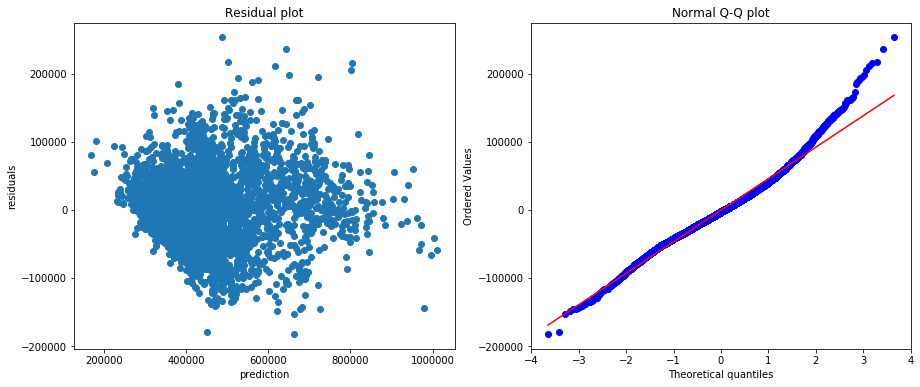

In [45]:
y_pred = results.predict(X_pred)
diagnostic_plot(y_val,y_pred)
plt.savefig("res_4room_only.png")

The skewness slightly improved v.s. the all flat type model

In [48]:
flat_types = list(data_train.flat_type.unique())

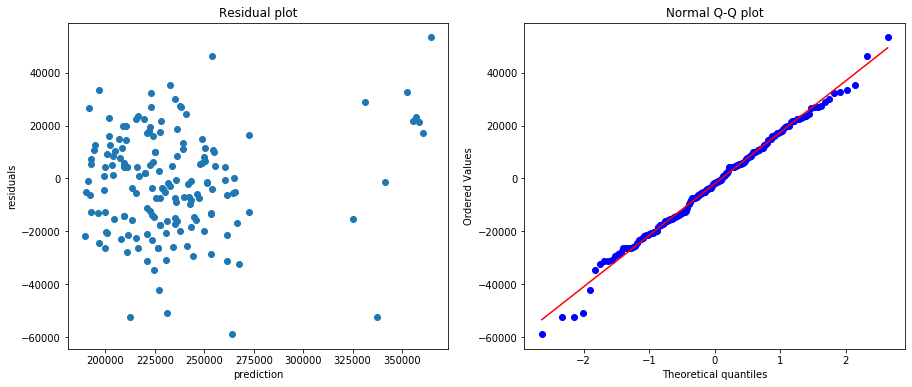

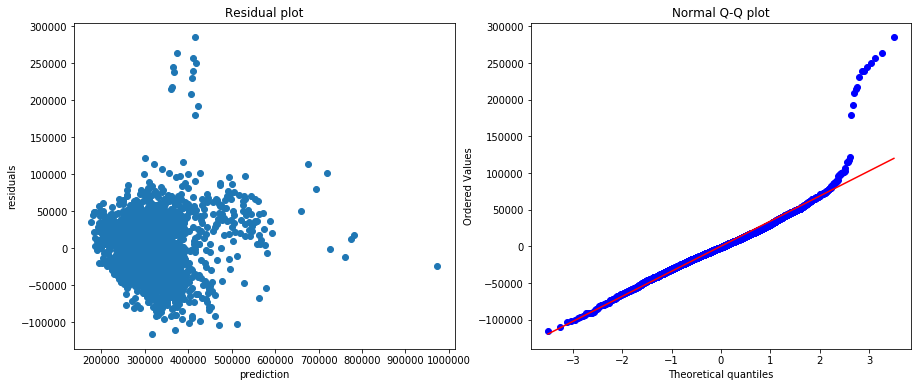

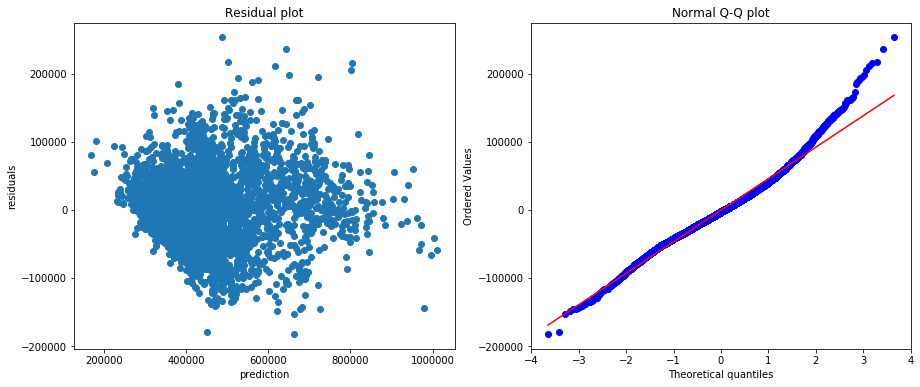

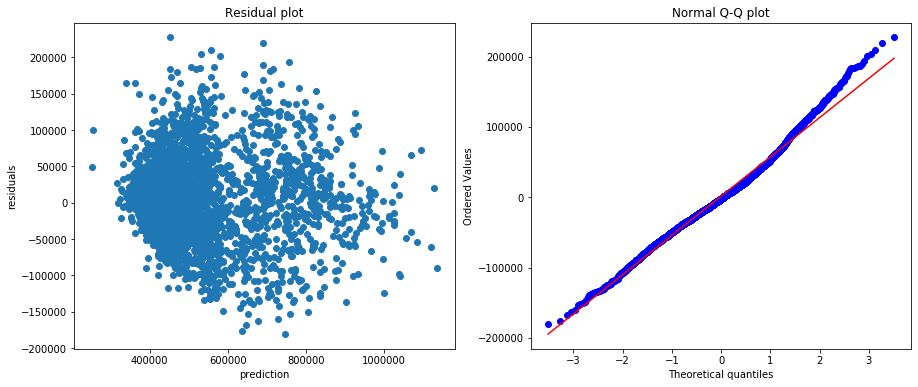

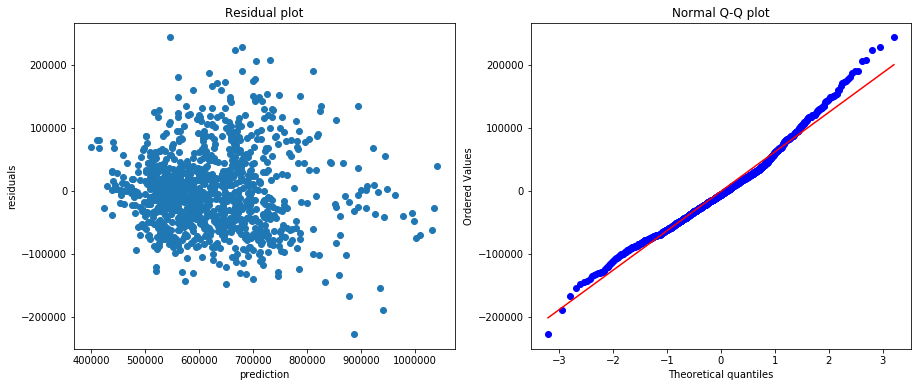

In [51]:
for index,flat in enumerate(flat_types):    
    #split data
    X,y = treat_features_filter(data_train,flat)
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)
    #train and fit model
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_val)
    #calculate errors
    lr_r2,lr_RMSE,lr_MAE = get_metrics(y_val,y_pred)
    #store error
    err_dict[f'only_{flat}'] = [lr_r2,lr_RMSE,lr_MAE]
    #plot res plot and save
    diagnostic_plot(y_val,y_pred)
    plt.savefig("res_{}_only.png".format(index))

From the graph we observe that 3 room flats have very heavy right tail (more outliners on the high side) which makes it not suitable fitting with linear regression

On the other hand, 1/2 room flat follows the assumption very well as the QQ plot shows almost a straight line

4 Room flats, 5 room flats and executives/massionettes are a little in the middle ground as the graph shows slightly curvy behavior which indicates a slight right skewness

We will check the error of each model

In [60]:
Errors = pd.DataFrame.from_dict(err_dict,orient = 'index',columns = ['R2','RMSE','MAE'])

In [61]:
Errors

,R2,RMSE,MAE
All_flat_type,0.870022,56346.806792,42984.239261
only_1 / 2 ROOM,0.788517,19398.095164,15483.764616
only_3 ROOM,0.767924,35363.014657,25744.622653
only_4 ROOM,0.846537,46655.131979,35218.204975
only_5 ROOM,0.859917,56074.502709,42914.345260
only_EXECUTIVE & MULTI-GENERATION,0.711814,62961.793057,48688.356219


Again we observe that the errors are not comparable to each other (different scale hence different magnitude of error), only Rsquare is useful here.

Modeling type after type does not give us improvement of the fit. However, we identified that 3 room flats have the most number of outliners

We will try to model it without 3 room flats below

In [63]:
def treat_features_filter (df):
    df = pd.DataFrame(df[df['flat_type'] != "3 ROOM"])
    columns_to_keep = ['town','storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = df['resale_price']
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','school_rank_nearby','flat_model']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = False)
    return X,y

In [64]:
X,y = treat_features_filter(data_train)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)

In [65]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_val)
model = sm.OLS(y_train,X)

results = model.fit()
results.summary()

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     4400.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:46:56   Log-Likelihood:            -3.5445e+05
No. Observations:               28718   AIC:                         7.090e+05
Df Residuals:                   28676   BIC:                         7.093e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -2.401e+05   3807.323    -63.062      0.000   -2.48e+05   -2.33e+05
storey                                 4601.1708     61.593     74.702      0.000    4480.445    4721.897
floor_area_sqm                         4370.4770     24.497    178.409      0.000    4322.462    4418.492
Remaining_lease_years                  4881.0167     50.081     97.462      0.000    4782.856    4979.178
num_schools                            2825.3630    167.678     16.850      0.000    2496.707    3154.019
town_ANG MO KIO                        4.124e+04   2097.749     19.659      0.000    3.71e+04    4.54e+04
town_BEDOK                             5540.7146   1702.977      3.254      0.001    2202.800    8878.629
town_BISHAN                            1.079e+05   2271.762     47.490      0.000    1.03e+05    1.12e+05
town_BUKIT BATOK                      -8.678e+04   1972.869    -43.988      0.000   -9.06e+04   -8.29e+04
town_BUKIT MERAH                       1.444e+05   1824.649     79.154      0.000    1.41e+05    1.48e+05
town_BUKIT PANJANG                    -1.335e+05   1898.782    -70.300      0.000   -1.37e+05    -1.3e+05
town_BUKIT TIMAH                       2.395e+05   5530.742     43.311      0.000    2.29e+05     2.5e+05
town_CENTRAL AREA                        1.2e+05   6265.010     19.155      0.000    1.08e+05    1.32e+05
town_CHOA CHU KANG                    -1.725e+05   1788.201    -96.441      0.000   -1.76e+05   -1.69e+05
town_CLEMENTI                          9.328e+04   2694.679     34.615      0.000     8.8e+04    9.86e+04
town_GEYLANG                           7.528e+04   2551.311     29.507      0.000    7.03e+04    8.03e+04
town_HOUGANG                          -9.212e+04   1664.220    -55.356      0.000   -9.54e+04   -8.89e+04
town_JURONG EAST                      -5.485e+04   2399.623    -22.857      0.000   -5.96e+04   -5.01e+04
town_JURONG WEST                      -1.445e+05   1272.673   -113.570      0.000   -1.47e+05   -1.42e+05
town_KALLANG/WHAMPOA                   8.774e+04   2220.978     39.504      0.000    8.34e+04    9.21e+04
town_MARINE PARADE                     2.205e+05   5246.734     42.024      0.000     2.1e+05    2.31e+05
town_PASIR RIS                         -1.02e+05   1806.310    -56.470      0.000   -1.06e+05   -9.85e+04
town_PUNGGOL                          -1.477e+05   2570.517    -57.467      0.000   -1.53e+05   -1.43e+05
town_QUEENSTOWN                        1.796e+05   2474.189     72.584      0.000    1.75e+05    1.84e+05
town_SEMBAWANG                        -1.815e+05   1900.193    -95.513      0.000   -1.85e+05   -1.78e+05
town_SENGKANG                         -1.639e+05   1969.236    -83.211      0.000   -1.68e+05    -1.6e+05
town_SERA

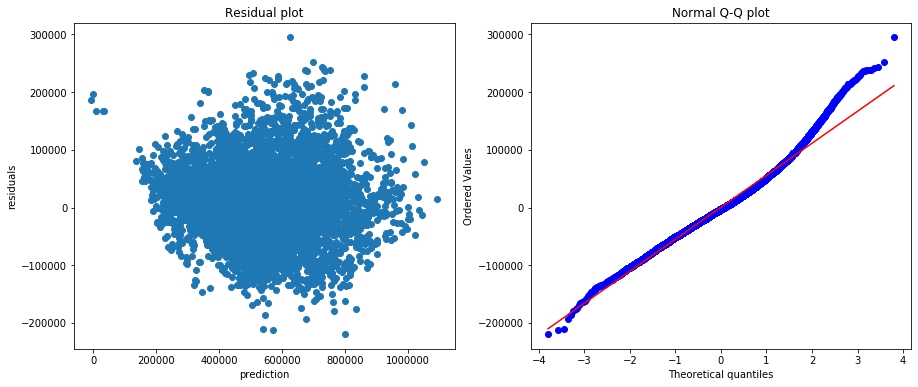

In [66]:
y_pred = results.predict(X_pred)
diagnostic_plot(y_val,y_pred)
plt.savefig("res_wo_3room.png")

We observe that skewness is sinificantly improved and the diagnostic plots are better.

In terms of R2 score it is still not as ideal as the all flat types model

## Transform target variable

The normal assumptions is met by this tranformation. This will be our final model for the exercise

In [106]:
def treat_features_logy (df):
    columns_to_keep = ['town','flat_type','storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = pd.Series(df['resale_price'].apply(lambda x: np.log(x)))
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','flat_type','school_rank_nearby','flat_model']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = True)
    return X,y

In [107]:
X,y = treat_features_logy(data_train)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)

In [108]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_val)
model = sm.OLS(y_train,X)

results = model.fit()
results.summary()

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     6577.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:51:52   Log-Likelihood:                 30068.
No. Observations:               37896   AIC:                        -6.004e+04
Df Residuals:                   37850   BIC:                        -5.965e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     11.1778      0.010   1067.292      0.000      11.157      11.198
storey                                     0.0084      0.000     75.827      0.000       0.008       0.009
floor_area_sqm                             0.0083   9.88e-05     84.176      0.000       0.008       0.009
Remaining_lease_years                      0.0099   8.61e-05    115.428      0.000       0.010       0.010
num_schools                                0.0044      0.000     14.927      0.000       0.004       0.005
town_BEDOK                                 0.0020      0.004      0.533      0.594      -0.005       0.010
town_BISHAN                                0.1802      0.005     35.790      0.000       0.170       0.190
town_BUKIT BATOK                          -0.1667      0.004    -38.559      0.000      -0.175      -0.158
town_BUKIT MERAH                           0.2189      0.004     53.175      0.000       0.211       0.227
town_BUKIT PANJANG                        -0.2499      0.005    -51.955      0.000      -0.259      -0.240
town_BUKIT TIMAH                           0.3762      0.011     34.807      0.000       0.355       0.397
town_CENTRAL AREA                          0.3104      0.008     37.030      0.000       0.294       0.327
town_CHOA CHU KANG                        -0.3386      0.005    -73.507      0.000      -0.348      -0.330
town_CLEMENTI                              0.1083      0.005     22.879      0.000       0.099       0.118
town_GEYLANG                               0.0861      0.005     18.228      0.000       0.077       0.095
town_HOUGANG                              -0.1663      0.004    -41.363      0.000      -0.174      -0.158
town_JURONG EAST                          -0.1109      0.005    -22.885      0.000      -0.120      -0.101
town_JURONG WEST                          -0.2692      0.004    -73.706      0.000      -0.276      -0.262
town_KALLANG/WHAMPOA                       0.1299      0.005     28.599      0.000       0.121       0.139
town_MARINE PARADE                         0.3648      0.008     46.800      0.000       0.350       0.380
town_PASIR RIS                            -0.1947      0.005    -42.739      0.000      -0.204      -0.186
town_PUNGGOL                              -0.2627      0.006    -45.529      0.000      -0.274      -0.251
town_QUEENSTOWN                            0.2558      0.005     53.520      0.000       0.246       0.265
town_SEMBAWANG                            -0.3869      0.005    -82.790      0.000      -0.396      -0.378
town_SENGKANG                             -0.2981      0.005    -61.697      0.000      -0.308      -0.289
town_SERANGOON                             0.0022      0.005      0.453      0.651     

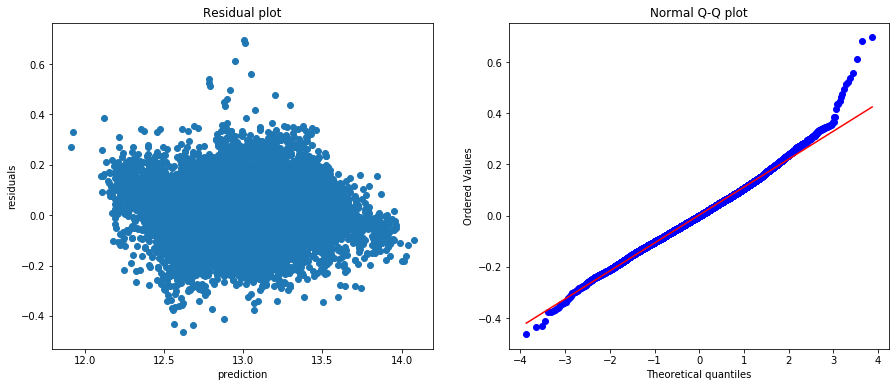

In [109]:
y_pred = results.predict(X_pred)
diagnostic_plot(y_val,y_pred)
plt.savefig("res_ylog.png")

In [112]:
lr_r2,lr_RMSE,lr_MAE = get_metrics(y_val,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(lr_r2,lr_RMSE,lr_MAE))

The R2 score is 0.888 ,RMSE is 0.110, MAE is 0.086


In order to fit LASSO or Ridge regression, we have to transform the numeric variables using scalers. We chose to use standard scaler here

In [72]:
Scaler = StandardScaler()
X,y = treat_features(data_train)

In [73]:
numeric_features = ['floor_area_sqm','Remaining_lease_years','num_schools','storey']
X_numeric = X[numeric_features]
X_trans = Scaler.fit_transform(X_numeric)

In [74]:
for index,column in enumerate(numeric_features):
    X[column] = X_trans[:,index]

In [62]:
def Scaling (X,numeric_features,scaler):
    '''Scale numeric features accordingly with the scaler provided (scaler has to be a scaler object and trained before)'''
    X_numeric = X[numeric_features]
    X_trans = scaler.transform(X_numeric)
    for index,column in enumerate(numeric_features):
        X[column] = X_trans[:,index]
    return X

In [75]:
X.head()

,storey,floor_area_sqm,Remaining_lease_years,num_schools,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Simplified,flat_model_Model A,flat_model_Terrace/Multi-Gen/Adjoined,flat_model_Maisonette,flat_model_Type S,flat_type_1 / 2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE & MULTI-GENERATION
0,0.409030,-2.227435,-1.084288,0.567010,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.149015,-1.278393,-1.145954,-0.273392,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.149015,-1.278393,-0.995214,-1.393929,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.629667,-1.237131,-1.022621,0.286876,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.149015,-1.278393,-0.995214,-1.393929,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Lasso Model

In [76]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)

In [83]:
alphas = [0.01,0.05,0.1,0.5,1,5]
LS = LassoCV(alphas = alphas ,cv=5, random_state=seed).fit(X_train, y_train)

C:\Users\Zhiqing\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033422095201.8594, tolerance: 71523446624.62386
  tol, rng, random, positive)
C:\Users\Zhiqing\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400606643609.0, tolerance: 71443073033.90756
  tol, rng, random, positive)
C:\Users\Zhiqing\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1054365570428.6875, tolerance: 71569007091.5273
  tol, rng, random, positive)
C:\Users\Zhiqing\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

In [84]:
LS.alpha_

0.01

In [79]:
dict(zip(X_train.columns, LS.coef_))

{'storey': 25972.811042494443,
 'floor_area_sqm': 93166.6787592859,
 'Remaining_lease_years': 56091.73311420259,
 'num_schools': 7387.187015209525,
 'town_ANG MO KIO': 83226.17772229546,
 'town_BEDOK': 79946.47318806953,
 'town_BISHAN': 182669.27698088993,
 'town_BUKIT BATOK': 6082.742438619828,
 'town_BUKIT MERAH': 194869.5372757407,
 'town_BUKIT PANJANG': -48018.58875980189,
 'town_BUKIT TIMAH': 292251.04346921184,
 'town_CENTRAL AREA': 200289.93466164978,
 'town_CHOA CHU KANG': -81038.9359918578,
 'town_CLEMENTI': 132288.31720082372,
 'town_GEYLANG': 130460.09710125193,
 'town_HOUGANG': -748.601322754449,
 'town_JURONG EAST': 27059.64776581372,
 'town_JURONG WEST': -45865.87636931857,
 'town_KALLANG/WHAMPOA': 141854.79393505023,
 'town_MARINE PARADE': 247431.34957253214,
 'town_PASIR RIS': -21313.827886829004,
 'town_PUNGGOL': -62918.19004738813,
 'town_QUEENSTOWN': 210033.82430932994,
 'town_SEMBAWANG': -104871.1977525894,
 'town_SENGKANG': -74429.89448466514,
 'town_SERANGOON': 81

Interesting finding revealed by LASSO model:
* Bukit Merah is significantly more exp than AMK while Jurong west, Woodlands are significantly cheaper than AMK
* Type of HDB does not matter as much as floor area
* Storey is significant and people showed a strong preference towards high storey :the higher the storey the more expensive it is
* Number of schools nearby is negatively related to sales prices. It is not quite surprising as we observe the number of schools increases if the quality of the schools nearby are not as good. Hence people are not willing to pay as much for those that has excellent schools nearby

In [85]:
y_pred = LS.predict(X_val)

LS_r2,LS_RMSE,LS_MAE = get_metrics(y_val,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(LS_r2,LS_RMSE,LS_MAE))

The R2 score is 0.870 ,RMSE is 56346.819, MAE is 42984.254


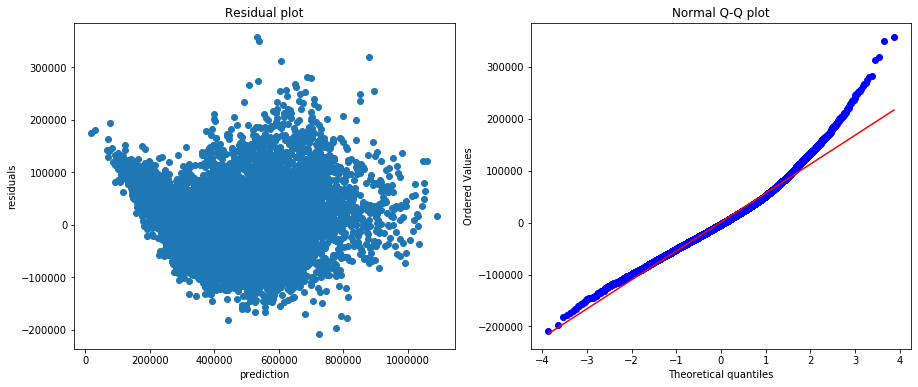

In [86]:
diagnostic_plot(y_val,y_pred)

LASSO does not work well with this set of data

## Ridge Regression

In [81]:
alphas = [0.005,0.01,0.05,0.1,0.5,1,5]
Rm = RidgeCV(alphas = alphas ,cv=5).fit(X_train, y_train)

In [87]:
dict(zip(X_train.columns, Rm.coef_))

{'floor_area_sqm': 0.19712591069205335,
 'Remaining_lease_years': 0.12967346845704797,
 'num_schools': 0.008972605111294055,
 'town_BEDOK': -0.020072309127698987,
 'town_BISHAN': 0.16828813198032286,
 'town_BUKIT BATOK': -0.20060411222889507,
 'town_BUKIT MERAH': 0.18798692758554914,
 'town_BUKIT PANJANG': -0.2904020278254862,
 'town_BUKIT TIMAH': 0.33591478496259186,
 'town_CENTRAL AREA': 0.3163128516670152,
 'town_CHOA CHU KANG': -0.3844989024253309,
 'town_CLEMENTI': 0.09149190302445781,
 'town_GEYLANG': 0.05433655479310934,
 'town_HOUGANG': -0.1978081177949278,
 'town_JURONG EAST': -0.1401797865605175,
 'town_JURONG WEST': -0.3149450989394017,
 'town_KALLANG/WHAMPOA': 0.11151890528508261,
 'town_MARINE PARADE': 0.33250463696361277,
 'town_PASIR RIS': -0.24794063593704468,
 'town_PUNGGOL': -0.30061341485437637,
 'town_QUEENSTOWN': 0.22612840123676112,
 'town_SEMBAWANG': -0.44682058431642313,
 'town_SENGKANG': -0.33659337964859326,
 'town_SERANGOON': -0.02903457699304944,
 'town_TAMP

In [87]:
y_pred = Rm.predict(X_val)

Rm_r2,Rm_RMSE,Rm_MAE = get_metrics(y_val,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(Rm_r2,Rm_RMSE,Rm_MAE))

The R2 score is 0.870 ,RMSE is 56348.746, MAE is 42986.283


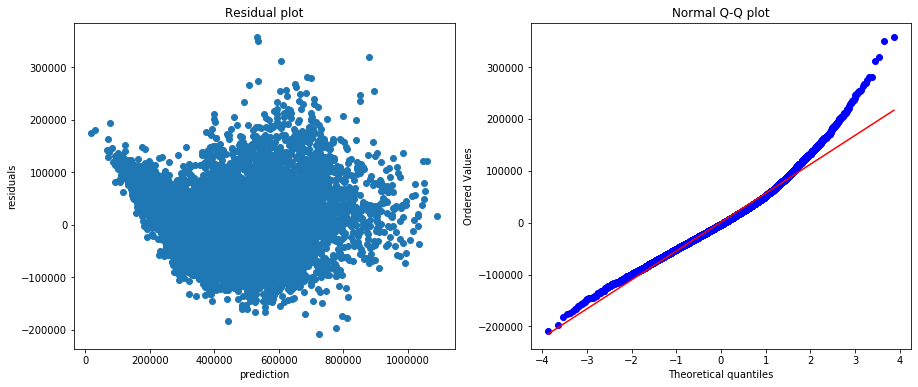

In [88]:
diagnostic_plot(y_val,y_pred)

Ridge model does not improve the original fit neither